# Optimización - Laboratorio 10

### Isabella Salgado 201730418
### Juan Pablo Naranjo 201730006

## Librerías para el laboratorio

In [2]:
import numpy as np
from numpy import inf
from numpy import linalg as LA
import sympy as sym
from sympy import *
from scipy.optimize import linprog
from scipy.optimize import minimize
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import random
import numdifftools as nd

## Punto 1

A continuación se presenta la implementación del algoritmo de gradiente descendiente:

In [3]:
def descenso_grad(tol, x0, a, f, Nmax):
    # Entradas
    # tol: tolerancia del algoritmo, valor mínimo que debe haber de distancia entre x(k+1) y x(k) para parar de iterar.
    # x0: condición incial, necesariamente ingresada como un vector columna.
    # a: alpha (magnitud de los saltos)
    # f: función a la que se le quiere aplicar el algoritmo
    # Nmax: número máximo de iteraciones
    
    # k representa la iteración actual.
    k = 0
    
    # dif es un parámetro que representará la distancia entre x(k+1) y x(k).
    dif = 1
    
    # Si la función f es de dimensión 2 o mayor, se aplica el siguiente código:
    if isinstance(x0, (list, tuple, np.ndarray)):
        
        # Se crea una matriz en donde se irá guardando el valor actual de x(k). El número de columnas de A es el número
        # de variables del vector x(k).
        A = np.zeros((1,np.shape(x0)[0]))
        
        # La primera fila de la matriz corresponde al punto inicial.
        A[0,:] = x0.transpose()
        
        # El algoritmo se detiene cuando la distancia entre x(k+1) y x(k) es menor al valor de tolerancia que entra por
        # parámetro y cuando todavía no se ha alcanzado el número máximo de iteraciones.
        while(k < Nmax and dif > tol):
            
            # Se calcula el gradiente de la función, evaluado en la iteración actual. El resultado de esta función es un 
            # vector fila.
            gradiente = nd.Gradient(f)(x0)
            
            # Se crea un gradiente auxiliar pero de tipo vector columna, para poderlo operar con la condición inicial.
            grad = np.zeros((np.size(gradiente),1))
            
            # Se va llenando el vector gradiente auxiliar con los valores del vector gradiente original. De esta forma,
            # ya se tiene el resultado del gradiente expresado como vector columna, tal como se requiere para poder 
            # hacer operaciones.
            for i in range(0,np.size(gradiente)):
                grad[i] = gradiente[i]
            
            # Se aplica la fórmula del gradiente descendiente.
            x = x0 - a*grad
            
            # Se transpone el x(k+1) para luego agregarlo a la matriz A.
            xaux = x.transpose()
            A = np.append(A, xaux, axis=0)
            
            # Se calcula la distancia entre x(k) y x(k+1)
            dif = LA.norm(x-x0)
            
            # Para avanzar a la siguiente iteración.
            k+=1
            
            # Se asigna al vector 'viejo', el valor recientemente encontrado, peus este es el que se debe usar para la 
            # siguiente iteración.
            x0 = x
    
    # Si la función f es de una sola variable, se aplica el siguiente código:
    elif isinstance(x0, float) or isinstance(x0, int):
        
        # El algoritmo se detiene cuando la distancia entre x(k+1) y x(k) es menor al valor de tolerancia que entra por
        # parámetro y cuando todavía no se ha alcanzado el número máximo de iteraciones.
        while(k < Nmax and dif > tol):
            
            # Se crea una matriz en donde se irá guardando el valor actual de x(k).
            A = np.zeros((1,1))
            
            # Se encuentra el valor del gradiente.
            gradiente = nd.Gradient(f)(x0)
            
            # Se aplica la fórmula del gradiente descendiente y se agrega el valor encontrado a la matriz A.
            x = x0 - a*gradiente
            A = np.append(A, x)
            
            # Se calcula la distancia entre x(k) y x(k+1)
            dif = LA.norm(x-x0)
            
            # Para avanzar a la siguiente iteración.
            k+=1
            
            # Se asigna al vector 'viejo', el valor recientemente encontrado, peus este es el que se debe usar para la 
            # siguiente iteración.
            x0 = x
        
    # Salidas:
    # x: resultado final al que el algoritmo convergió cuando se cumplió la condición de parada, es decir, el mínimo.
    # A: Matriz en la que se encuentran todos los x(k) requeridos para llegar al x mínimo.
        
    return x, A

## Punto 2

Se aplica el algoritmo de gradiente descendiente a la función con los distintos valores de $\alpha$:

In [4]:
# Se define la función
def f(x):
    Q = np.array([[1,0],[0,2]])
    B = np.array([[1/2],[0]])
    C = 5
    return Q[0,0]*x[0]**2 + (Q[0,1]+Q[1,0])*x[0]*x[1] + Q[1,1]*x[1]**2 + B[0]*x[0] + B[1]*x[1] + C

# Se definen los distintos parámetros que el algoritmo necesita
alpha = [0.1, 0.3, 0.8]
x0 = np.array([[2],[2]])
N = 10000
tol = 10**-6

# Lista para guardar las soluciones encontradas para cada alpha
sols = []

# Se aplica el algoritmo iterativamente y se agrega la solución a la lista
for a in alpha:
    xsol, soluciones = descenso_grad(tol, x0, a, f, N)
    sols.append(xsol)
    
print(f'\nSolución con alpha = {alpha[0]}: \n {sols[0]}' )
print(f'\nSolución con alpha = {alpha[1]}: \n {sols[1]}' )
print(f'\nSolución con alpha = {alpha[2]}: \n {sols[2]}' )


Solución con alpha = 0.1: 
 [[-2.49996552e-01]
 [ 9.74368872e-14]]

Solución con alpha = 0.3: 
 [[-2.49999613e-01]
 [-2.62093300e-12]]

Solución con alpha = 0.8: 
 [[-2.49489061e-01]
 [-5.23201255e+15]]


Como se puede notar, para $\alpha = 0.1$ y para $\alpha = 0.3$, el algoritmo de gradiente descendiente converge a un valor casi idéntico. Sin embargo, cuando se usa un $\alpha = 0.8$, el algoritmo diverge a un valor muy alejado del valor mínimo real de la función.

In [5]:
# Se vuelve a aplicar el algoritmo para los primeros dos valores de alpha, que son los que converge, para poder usar estos
# resultados al momento de graficar.
x1, sol1 = descenso_grad(tol, x0, alpha[0], f, N)
x2, sol2 = descenso_grad(tol, x0, alpha[1], f, N)

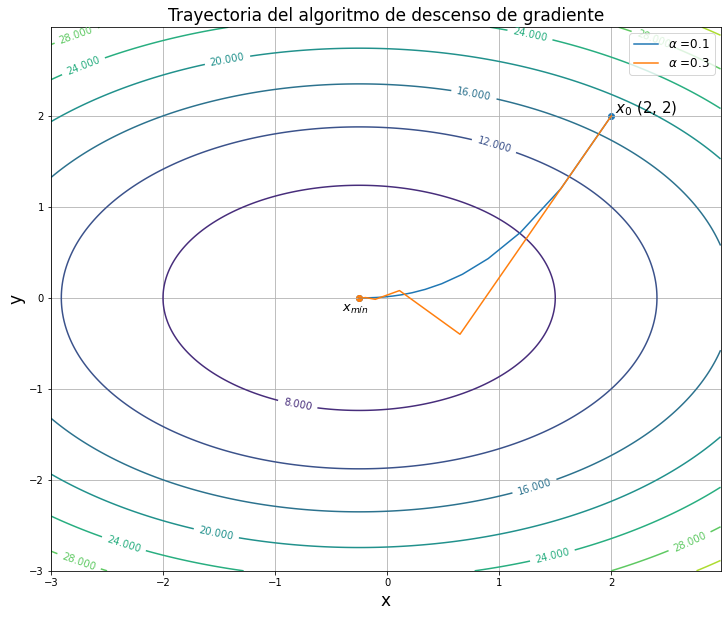

In [6]:
# Se construyen las curvas de contorno de la función f.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = X**2 + 2*Y**2 + (1/2)*X + 5

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafican las trayectorias tomadas por el algoritmo para cada alpha correspondiente.
plt.plot(sol1[:,0], sol1[:,1], label = r'$\alpha$ =' + f'{alpha[0]}')
plt.plot(sol2[:,0], sol2[:,1], label = r'$\alpha$ =' + f'{alpha[1]}')

plt.annotate("$x_0$ (2, 2)", x0+0.03, fontsize="15")
plt.annotate("$x_{mín}$", x1-0.15, fontsize="13")

plt.scatter([x0[0], x1[0]], [x0[1], x1[1]])
plt.scatter(x2[0], x2[1])
plt.legend(fontsize="12")


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente', fontsize="17")
ax.grid()
plt.show()

En la gráfica de arriba no se encuentra graficada la trayectoria para $\alpha = 0.8$, pues el valor final obtenido para esta valor de $\alpha$ es muy grande comparado con los otros dos, y no permitiría observar claramente los otros resultados.

Se puede conlcuir que, a medida que el valor del parámetro $\alpha$ aumenta, más propenso se vuelve el algoritmo a diverger, pues se estarían dando saltos más grandes por la función que pueden volver a retornar valores de $f(x_{mín})$ que son mayores al valor de $x_{mín}$ anterior.

## Punto 3

In [25]:
# Se define la función
def gamma(x):
    return (3*(1-x[0])**2)*np.exp(-x[0]**2-(x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5)*np.exp(-x[0]**2-x[1]**2) - (1/3)*np.exp(-(x[0]+1)**2-x[1]**2)

### a)
Se aplica el algoritmo de gradiente descendiente para diferentes puntos iniciales:

In [8]:
# Se declaran los parámetros para ingresar al algoritmo.
tol = 10**-6
a=0.01
Nmax = 10000

# Se declaran todos los puntos iniciales como vectores columna (pues así lo requiere el algoritmo)
x01 = np.array([[1.7],[-0.5]])
x02 = np.array([[-0.5],[-1.2]])
x03 = np.array([[-2],[-1]])
x04 = np.array([[1],[2]])
x05 = np.array([[2],[1]])

# Se ponen todos los puntos iniciales en una lista.
puntos_iniciales = [x01, x02, x03, x04, x05]

# Se crea una lista vacía en donde se guardarán las soluciones para la función.
sols2 = []

# Se aplica el algoritmo para cada punto inicial
for x in puntos_iniciales:
    xsol2, soluciones2 = descenso_grad(tol, x, a, gamma, Nmax)
    sols2.append(xsol2)

for i in range(0,len(puntos_iniciales)):
    print(f'\nSolución con \n x0 = \n {puntos_iniciales[i]}: \n \n {sols2[i]}')


Solución con 
 x0 = 
 [[ 1.7]
 [-0.5]]: 
 
 [[ 3.50543959]
 [-1.48108127]]

Solución con 
 x0 = 
 [[-0.5]
 [-1.2]]: 
 
 [[ 0.22827481]
 [-1.62553638]]

Solución con 
 x0 = 
 [[-2]
 [-1]]: 
 
 [[-1.34739965]
 [ 0.20450967]]

Solución con 
 x0 = 
 [[1]
 [2]]: 
 
 [[2.33655707]
 [3.36736098]]

Solución con 
 x0 = 
 [[2]
 [1]]: 
 
 [[3.43806788]
 [1.65447625]]


In [9]:
# Se aplica el algoritmo para los distintos puntos iniciales
xmin1, A1 = descenso_grad(tol, x01, a, gamma, Nmax)
xmin2, A2 = descenso_grad(tol, x02, a, gamma, Nmax)
xmin3, A3 = descenso_grad(tol, x03, a, gamma, Nmax)
xmin4, A4 = descenso_grad(tol, x04, a, gamma, Nmax)
xmin5, A5 = descenso_grad(tol, x05, a, gamma, Nmax)

Con $x_{01} = (1.7, -0.5)$

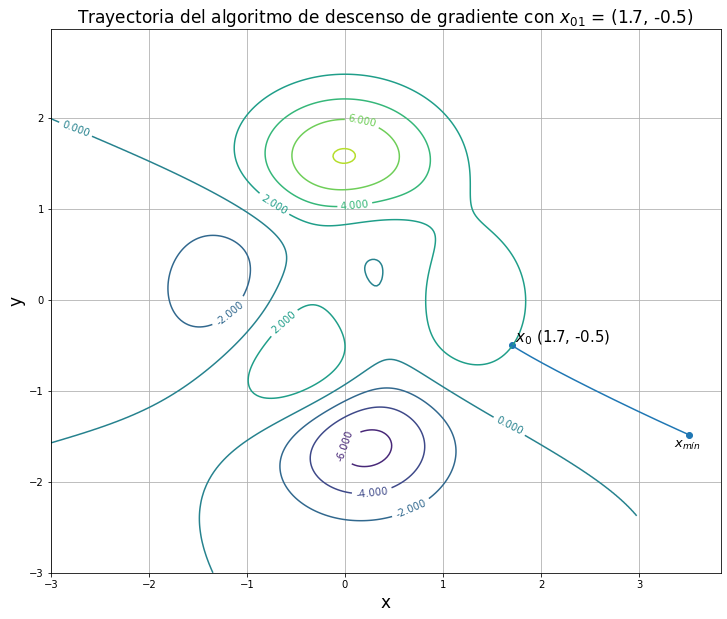

In [10]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A1[:,0], A1[:,1], label = r'$x_0$ =' + "(1.7, -0.5)")

plt.annotate("$x_0$ (1.7, -0.5)", x01+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin1-0.15, fontsize="13")

plt.scatter([x01[0], xmin1[0]], [x01[1], xmin1[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente con $x_{01}$ = (1.7, -0.5)', fontsize="17")
ax.grid()
plt.show()

Con $x_{02} = (-0.5, -1.2)$:

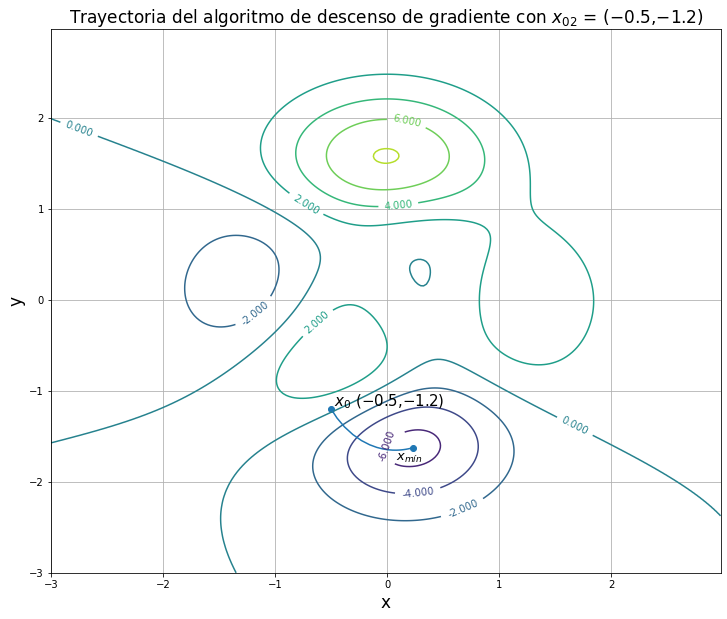

In [11]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A2[:,0], A2[:,1], label = r'$x_0$ =' + "(−0.5,−1.2)")

plt.annotate("$x_0$ (−0.5,−1.2)", x02+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin2-0.15, fontsize="13")

plt.scatter([x02[0], xmin2[0]], [x02[1], xmin2[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente con $x_{02}$ = (−0.5,−1.2)', fontsize="17")
ax.grid()
plt.show()

Con $x_{03} = (-2, -1)$:

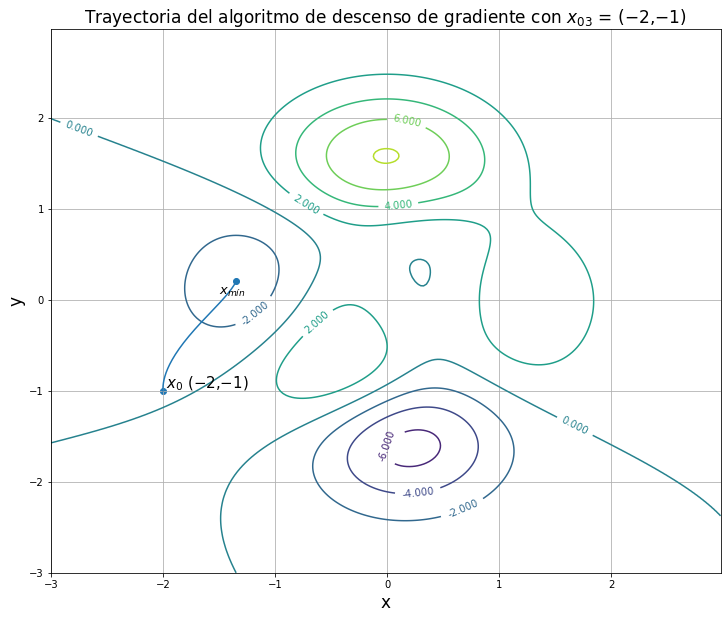

In [12]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A3[:,0], A3[:,1], label = r'$x_0$ =' + "(−2,−1)")

plt.annotate("$x_0$ (−2,−1) ", x03+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin3-0.15, fontsize="13")

plt.scatter([x03[0], xmin3[0]], [x03[1], xmin3[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente con $x_{03}$ = (−2,−1)', fontsize="17")
ax.grid()
plt.show()

Con $x_{04} =  (1 , 2)$:

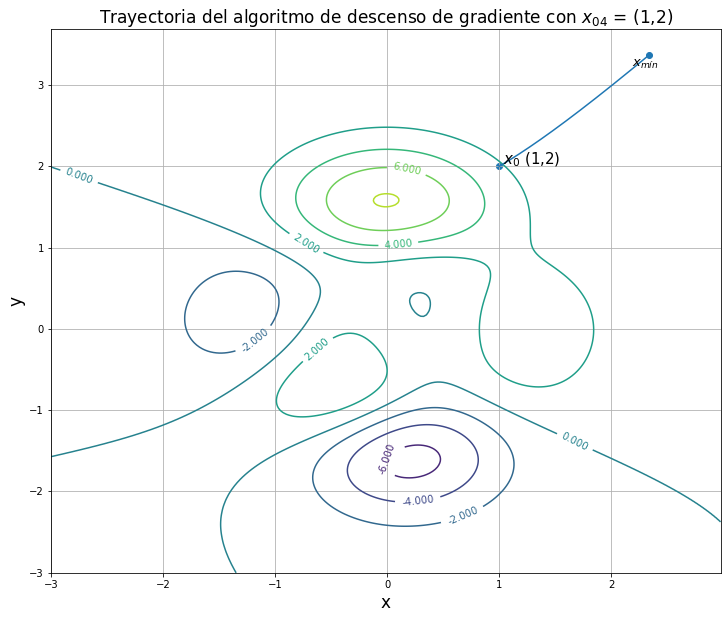

In [13]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A4[:,0], A4[:,1], label = r'$x_0$ =' + "(1,2)")

plt.annotate("$x_0$ (1,2)", x04+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin4-0.15, fontsize="13")

plt.scatter([x04[0], xmin4[0]], [x04[1], xmin4[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente con $x_{04}$ = (1,2)', fontsize="17")
ax.grid()
plt.show()

Con $x_{05} =  (2 , 1)$:

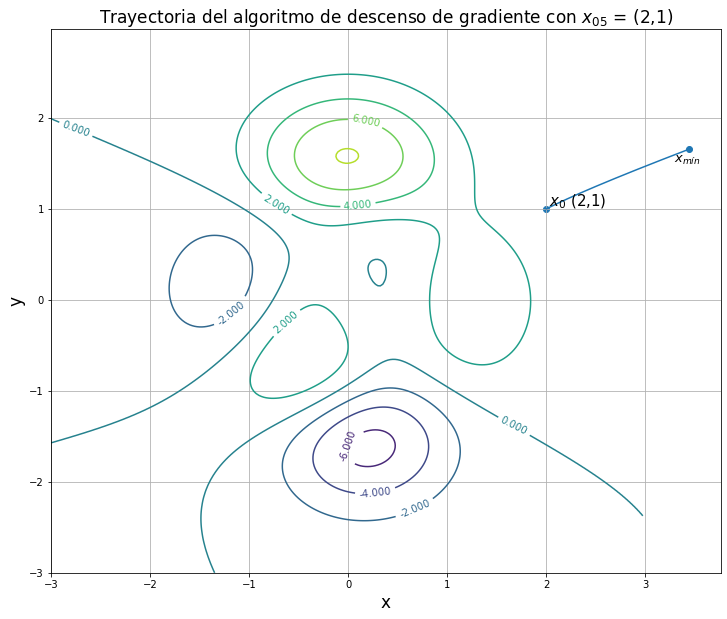

In [14]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A5[:,0], A5[:,1], label = r'$x_0$ =' + "(2,1)")

plt.annotate("$x_0$ (2,1)", x05+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin5-0.15, fontsize="13")

plt.scatter([x05[0], xmin5[0]], [x05[1], xmin5[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente con $x_{05}$ = (2,1)', fontsize="17")
ax.grid()
plt.show()

### b)

Gradiente aproximado

In [15]:
def descenso_grad_aprox(tol, x0, a, f, Nmax):
    # Entradas
    # tol: tolerancia del algoritmo, valor mínimo que debe haber de distancia entre x(k+1) y x(k) para parar de iterar.
    # x0: condición incial, necesariamente ingresada como un vector columna.
    # a: alpha (magnitud de los saltos)
    # f: función a la que se le quiere aplicar el algoritmo
    # Nmax: número máximo de iteraciones
    
    # Aproximación para calcular el gradiente.
    h = 0.01
    
    # k representa la iteración actual.
    k = 0
    
    # dif es un parámetro que representará la distancia entre x(k+1) y x(k).
    dif = 1
    
    # Si la función f es de dimensión 2 o mayor, se aplica el siguiente código:
    if isinstance(x0, (list, tuple, np.ndarray)):
        
        # Se define cada vector 'di' en una matriz.
        d = h*np.identity(np.shape(x0)[0])
        
        # Se crea una matriz en donde se irá guardando el valor actual de x(k). El número de columnas de A es el número
        # de variables del vector x(k).
        A = np.zeros((1,np.shape(x0)[0]))
        
        # La primera fila de la matriz corresponde al punto inicial.
        A[0,:] = x0.transpose()
        
        # El algoritmo se detiene cuando la distancia entre x(k+1) y x(k) es menor al valor de tolerancia que entra por
        # parámetro y cuando todavía no se ha alcanzado el número máximo de iteraciones.
        while(k < Nmax and dif > tol):
            
            # Se calcula el gradiente de la función, evaluado en la iteración actual. Se empieza por crear el vector
            # del gradiente
            gradiente = np.zeros((1, np.shape(x0)[0]))
            grad = np.zeros((np.shape(x0)[0],1))

            for i in range(0, np.shape(gradiente)[1]):
                # Se convierte en vector columna.
                grad[i] = gradiente[:,i]
                # Se convierte la i-ésima fila de la matriz d en un vector columna también, para poderlos operar.
                dcol = np.reshape(d[i], (-1, 1))
                # Se calcula el gradiente teniendo en cuenta la aproximación.
                grad[i] = (f(x0 + dcol) - f(x0))/h
            
            # Se aplica la fórmula del gradiente descendiente.
            x = x0 - a*grad
            
            # Se transpone el x(k+1) para luego agregarlo a la matriz A.
            xaux = x.transpose()
            A = np.append(A, xaux, axis=0)
            
            # Se calcula la distancia entre x(k) y x(k+1)
            dif = LA.norm(x-x0)
            
            # Para avanzar a la siguiente iteración.
            k+=1
            
            # Se asigna al vector 'viejo', el valor recientemente encontrado, peus este es el que se debe usar para la 
            # siguiente iteración.
            x0 = x
    
    # Si la función f es de una sola variable, se aplica el siguiente código:
    elif isinstance(x0, float) or isinstance(x0, int):
        
        # El algoritmo se detiene cuando la distancia entre x(k+1) y x(k) es menor al valor de tolerancia que entra por
        # parámetro y cuando todavía no se ha alcanzado el número máximo de iteraciones.
        while(k < Nmax and dif > tol):
            
            # Se crea una matriz en donde se irá guardando el valor actual de x(k).
            A = np.zeros((1,1))
            
            # Se encuentra el valor del gradiente usando la aproximación, sabiendo que en este caso, d = h.
            gradiente = (f(x0+h) - f(x0))/h
            
            # Se aplica la fórmula del gradiente descendiente y se agrega el valor encontrado a la matriz A.
            x = x0 - a*gradiente
            A = np.append(A, x)
            
            # Se calcula la distancia entre x(k) y x(k+1)
            dif = LA.norm(x-x0)
            
            # Para avanzar a la siguiente iteración.
            k+=1
            
            # Se asigna al vector 'viejo', el valor recientemente encontrado, peus este es el que se debe usar para la 
            # siguiente iteración.
            x0 = x
        
    # Salidas:
    # x: resultado final al que el algoritmo convergió cuando se cumplió la condición de parada, es decir, el mínimo.
    # A: Matriz en la que se encuentran todos los x(k) requeridos para llegar al x mínimo.
        
    return x, A

Se procede a aplicar el algoritmo con el cálculo aproximado del gradiente a los mismos puntos iniciales del punto 3.

In [16]:
# Parámetros
a = 0.01
tol = 10**-6
Nmax = 10000

# Se aplica el algoritmo para los distintos puntos iniciales
xmin_aprox1, A1_aprox = descenso_grad_aprox(tol, x01, a, gamma, Nmax)
xmin_aprox2, A2_aprox = descenso_grad_aprox(tol, x02, a, gamma, Nmax)
xmin_aprox3, A3_aprox = descenso_grad_aprox(tol, x03, a, gamma, Nmax)
xmin_aprox4, A4_aprox = descenso_grad_aprox(tol, x04, a, gamma, Nmax)
xmin_aprox5, A5_aprox = descenso_grad_aprox(tol, x05, a, gamma, Nmax)

Con $x_{01} = (1.7, -0.5)$

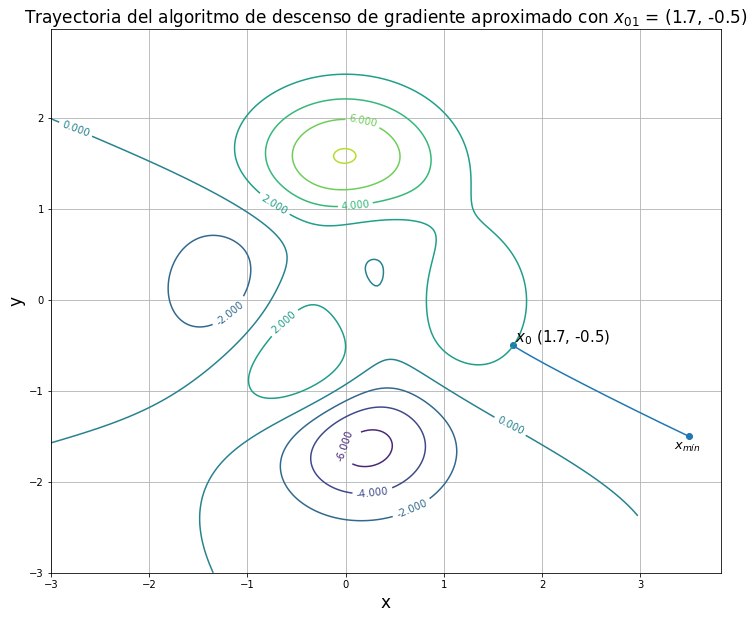

In [17]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A1_aprox[:,0], A1_aprox[:,1], label = r'$x_0$ =' + "(1.7, -0.5)")

plt.annotate("$x_0$ (1.7, -0.5)", x01+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin_aprox1-0.15, fontsize="13")

plt.scatter([x01[0], xmin_aprox1[0]], [x01[1], xmin_aprox1[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente aproximado con $x_{01}$ = (1.7, -0.5)', fontsize="17")
ax.grid()
plt.show()

Con $x_{02} = (-0.5, -1.2)$

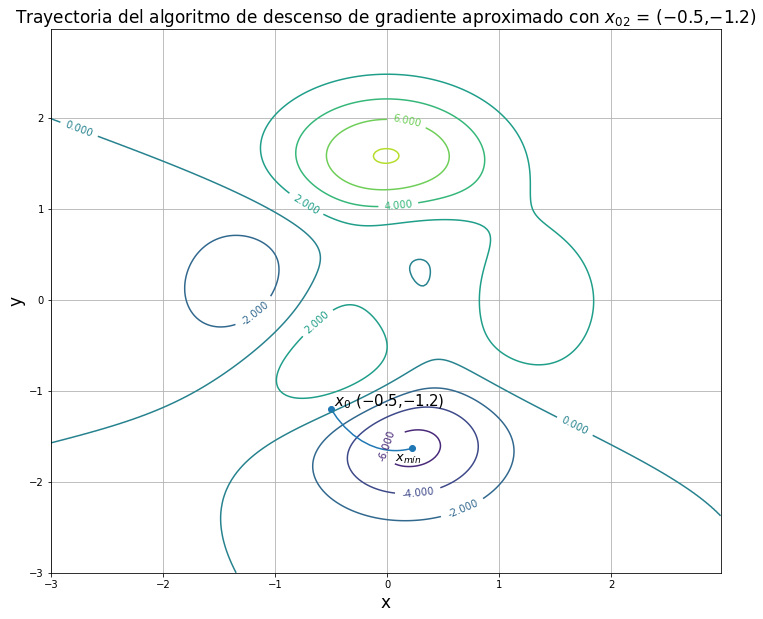

In [18]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A2_aprox[:,0], A2_aprox[:,1], label = r'$x_0$ =' + "(−0.5,−1.2)")

plt.annotate("$x_0$ (−0.5,−1.2)", x02+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin_aprox2-0.15, fontsize="13")

plt.scatter([x02[0], xmin_aprox2[0]], [x02[1], xmin_aprox2[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente aproximado con $x_{02}$ = (−0.5,−1.2)', fontsize="17")
ax.grid()
plt.show()

Con $x_{03} = (-2 , -1)$

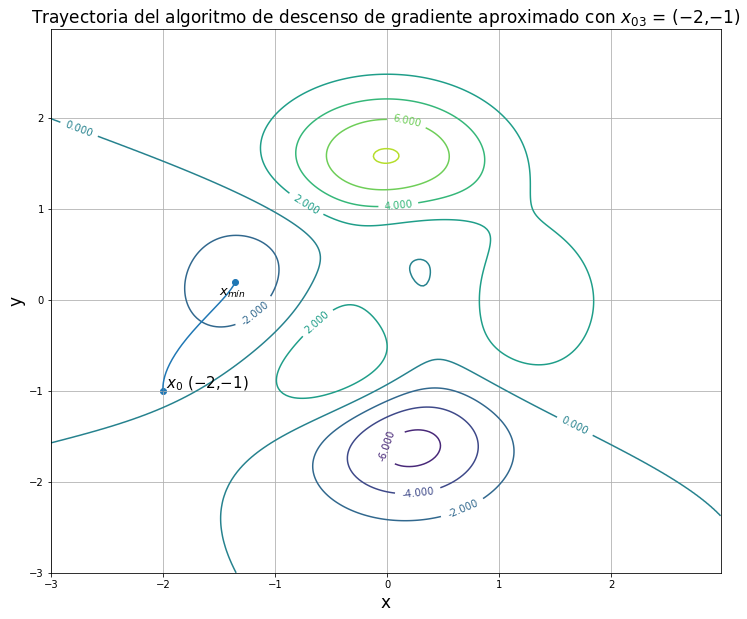

In [19]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A3_aprox[:,0], A3_aprox[:,1], label = r'$x_0$ =' + "(−2,−1)")

plt.annotate("$x_0$ (−2,−1)", x03+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin_aprox3-0.15, fontsize="13")

plt.scatter([x03[0], xmin_aprox3[0]], [x03[1], xmin_aprox3[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente aproximado con $x_{03}$ = (−2,−1)', fontsize="17")
ax.grid()
plt.show()

Con $x_{04} = (1 , 2)$

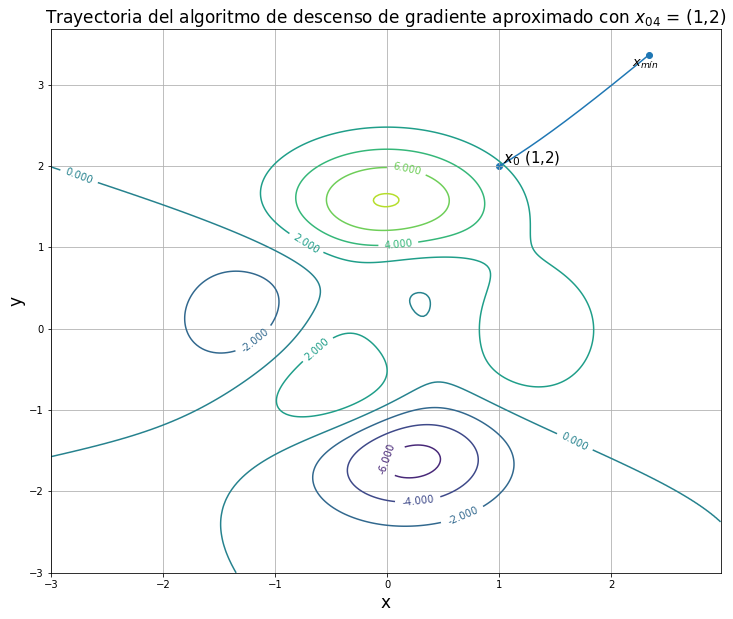

In [20]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A4_aprox[:,0], A4_aprox[:,1], label = r'$x_0$ =' + "(1,2)")

plt.annotate("$x_0$ (1,2)", x04+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin_aprox4-0.15, fontsize="13")

plt.scatter([x04[0], xmin_aprox4[0]], [x04[1], xmin_aprox4[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente aproximado con $x_{04}$ = (1,2)', fontsize="17")
ax.grid()
plt.show()

Con $x_{05} =  (2 , 1)$

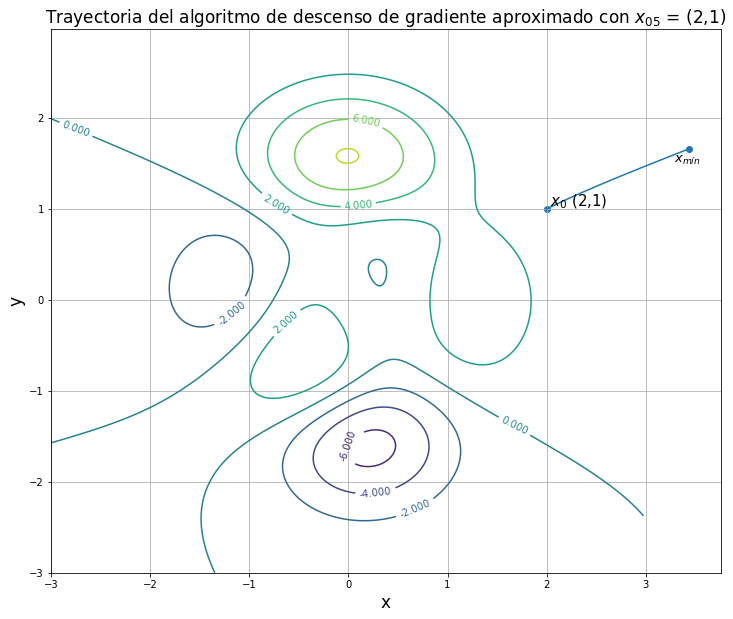

In [21]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A5_aprox[:,0], A5_aprox[:,1], label = r'$x_0$ =' + "(2,1)")

plt.annotate("$x_0$ (2,1)", x05+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin_aprox5-0.15, fontsize="13")

plt.scatter([x05[0], xmin_aprox5[0]], [x05[1], xmin_aprox5[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente aproximado con $x_{05}$ = (2,1)', fontsize="17")
ax.grid()


plt.show()

Como se puede notar, los resultados usando el método con el cálculo del gradiente aproximado son muy cercanos a los resultados usando el método con el cálculo exacto del gradiente.

### c)

El punto inicial influye en la convergencia del método de gradiente descendiente pues no todos los puntos iniciales están cerca de un mínimo de la función objetivo. Esto quiere decir que si se elige un punto inicial muy lejano de un mínimo local de la función, el algoritmo puede dar saltos que se alejen del mínimo local real.

Si se elige un punto inicial cercano a un mínimo local, el algoritmo va a converger a este punto, pues todos los saltos posibles van a estar en la dirección de este mínimo. Sin embargo, si se elige un punto inicial muy alejado de un mínimo local, el algoritmo va a diverger porque un salto lo puede dar para una dirección en la iteración $i$ pero en la siguiente, el salto lo puede dar en una dirección completamente distinta, y si se sigue así no se llegará nunca a un mínimo local de la función.

## Punto 4

Se define la región $D \subseteq \mathbb{R}^2$ como

$D = \{x = [x_1, x_2]^T \in \mathbb{R}^2 | -6.531 \leq \gamma(x_1, x_2) \leq -2 \}$

Para un $\alpha$ constante igual 0.01, se puede afirmar que existe la región cumple que todo $x_0 \in D$ garantiza la convergencia del algoritmo de descenso de gradiente al mínimo global de la función $\gamma$ porque en esta región, la función $\gamma$ es convexa y en cualquier punto de esta región, el gradiente va a estar apuntando hacia afuera, lo que significa que el algoritmo de descenso de gradiente siempre va a llevar a la función en sentido contrario, hasta eventualmente llegar al mínimo global de la función, en donde esta tiene un valor de $\gamma(x,y) = -6.531$, como se demustra en la celda siguiente:

In [28]:
gamma(np.array([[0.2],[-1.6]]))

array([-6.53100742])

A continuación se muestra una gráfica en 2 dimsensiones de la región $D$. En general, todos los puntos que están dentro de la región $D$ son los que se encuentran dentro de la curva de nivel $\gamma(x,y) = 2$, y estaría limitado hasta la curva de nivel $\gamma(x,y) = -6.531$, que es donde se encuentra el mínimo global de la función.

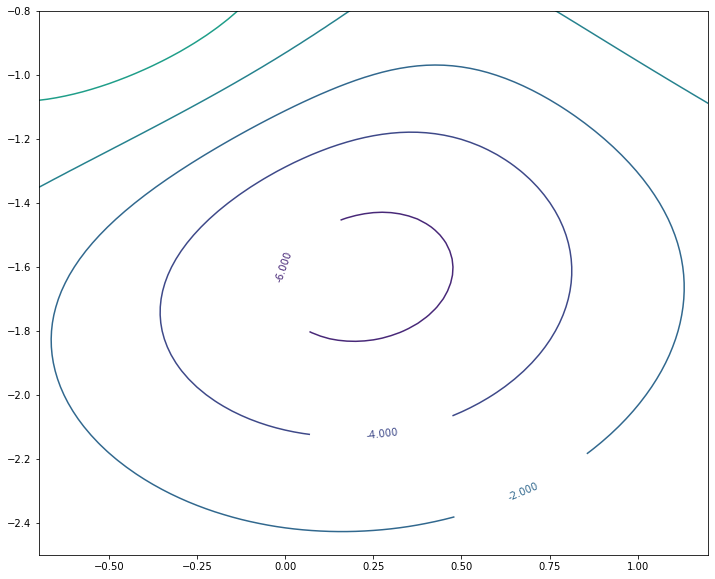

In [47]:
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

plt.xlim(-0.7, 1.2)
plt.ylim(-2.5, -0.8)
plt.show()